## Κοκορότσικου Αγνή Ιωάννα, 58767
[GitHub repository](https://github.com/AgniKoko/DIP_HW01)



---


# **DIP HW 1**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import csv
import math
from scipy.spatial import cKDTree



---


## **Step 1**

In [27]:
xyz_curves = "/content/cieXYZ_curves.csv"
csvfile = pd.read_csv(xyz_curves)
print(csvfile)
# print(csvfile.iloc[:, 0])

     λ (nm)         X         Y         Z
0       370  0.000415  0.000012  0.001946
1       371  0.000464  0.000014  0.002178
2       372  0.000519  0.000016  0.002436
3       373  0.000582  0.000017  0.002732
4       374  0.000655  0.000020  0.003078
..      ...       ...       ...       ...
356     726  0.001911  0.000690  0.000000
357     727  0.001781  0.000643  0.000000
358     728  0.001660  0.000599  0.000000
359     729  0.001546  0.000558  0.000000
360     730  0.001440  0.000520  0.000000

[361 rows x 4 columns]


> Για κάθε θερμοκρασία T από 1000Κ έως 30000Κ, υπολογίζεται η αντίστοιχη πυκνότητα φάσματος B(λ).

> Πολλαπλασιάζοντας το B(λ) με τις καμπύλες CMF και αθροίζοντας στο εύρος των μηκών κύματος, υπολογίζονται οι τιμές X,Y,Z  (σύμφωνα με την Διάλεξη 2, διαφάνειες 12-14, όπου το βήμα διακριτοποίησης είναι step_of_L_m = 1).

In [3]:
h = 6.62606957e-34
c = 299792458
k_B = 1.3806488e-23
list_of_B = []

step = 10
linspaceArg = round(((30000-1000)/ step)+1)
temps = np.linspace(1000, 30000, linspaceArg)

lambda_nm = csvfile.iloc[:, 0]
lambda_x = csvfile.iloc[:, 1]
lambda_y = csvfile.iloc[:, 2]
lambda_z = csvfile.iloc[:, 3]

# Μετατροπή nm -> m
lambda_m = lambda_nm.to_numpy() * 1e-9

def planck_radiance(lambda_m, T):
    return 2*h*c**2 / ((lambda_m**5) * (np.exp((h*c)/(lambda_m*k_B*T)) - 1))  # B_T(λ) for every λ

# Υπολογισμός (X, Y, Z) με διακριτό άθροισμα
def XYZ_calc(T):
    B = planck_radiance(lambda_m, T)
    list_of_B.append(B)
    if T in (1000, 5000, 10000, 15000, 20000, 25000, 30000):
      plt.plot(lambda_nm, B, label=f"{T:.0f} K")
    step_of_L_m = lambda_nm[1]-lambda_nm[0]
    X = np.sum(B * lambda_x)*step_of_L_m
    Y = np.sum(B * lambda_y)*step_of_L_m
    Z = np.sum(B * lambda_z)*step_of_L_m
    return X, Y, Z

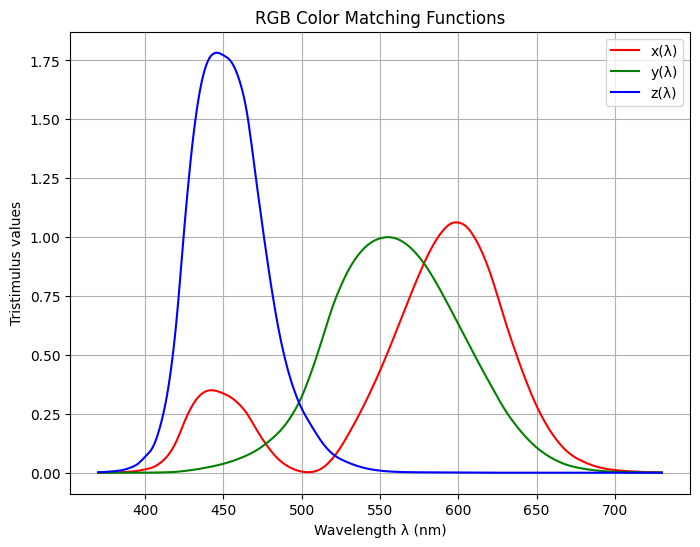

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(lambda_nm, lambda_x, label='x(λ)', color='red')
plt.plot(lambda_nm, lambda_y, label='y(λ)', color='green')
plt.plot(lambda_nm, lambda_z, label='z(λ)', color='blue')
plt.xlabel('Wavelength λ (nm)')
plt.ylabel('Tristimulus values')
plt.title('RGB Color Matching Functions')
plt.legend()
plt.grid(True)
plt.show()



---


## **Step 2**



> Έχοντας τις τιμές X,Y,Z για κάθε θερμοκρασία (στην ίδια for loop), υπολογίζονται οι κανονικοποιημένες συντεταγμένες χρωματικότητας x,y, όπως στη Διάλεξη 2, διαφάνεια 20.



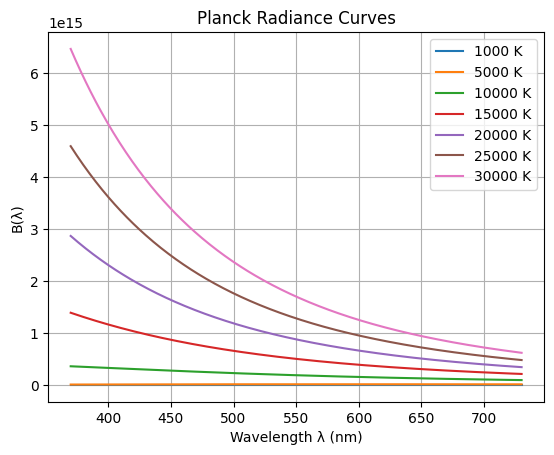

for T = 1000.0 K, the x = 652, y = 345
for T = 1010.0 K, the x = 651, y = 346
for T = 1020.0 K, the x = 650, y = 347
for T = 1030.0 K, the x = 648, y = 349
for T = 1040.0 K, the x = 647, y = 350
for T = 1050.0 K, the x = 645, y = 351
for T = 1060.0 K, the x = 644, y = 352
for T = 1070.0 K, the x = 643, y = 353
for T = 1080.0 K, the x = 641, y = 355
for T = 1090.0 K, the x = 640, y = 356
for T = 1100.0 K, the x = 638, y = 357
for T = 1110.0 K, the x = 637, y = 358
for T = 1120.0 K, the x = 636, y = 359
for T = 1130.0 K, the x = 634, y = 360
for T = 1140.0 K, the x = 633, y = 361
for T = 1150.0 K, the x = 632, y = 362
for T = 1160.0 K, the x = 630, y = 363
for T = 1170.0 K, the x = 629, y = 365
for T = 1180.0 K, the x = 627, y = 366
for T = 1190.0 K, the x = 626, y = 367
for T = 1200.0 K, the x = 625, y = 368
for T = 1210.0 K, the x = 623, y = 369
for T = 1220.0 K, the x = 622, y = 370
for T = 1230.0 K, the x = 621, y = 371
for T = 1240.0 K, the x = 619, y = 372
for T = 1250.0 K, the x =

In [5]:
diagr_X = []
diagr_Y = []
diagr_Z = []

curves_x = []
curves_y = []
curves_T = []
for T in temps:
    X, Y, Z = XYZ_calc(T)

    diagr_X.append(X)
    diagr_Y.append(Y)
    diagr_Z.append(Z)

    # Normalization (x, y)
    s = (X + Y + Z)
    x = X / s
    y = Y / s

    # print(f"for T = {T} K, the x = {x}, y = {y}")

    # c = round(1000*x)
    # r = round(1000*y)

    curves_x.append(round(1000*x))
    curves_y.append(round(1000*y))
    curves_T.append(T)
plt.xlabel('Wavelength λ (nm)')
plt.ylabel('Β(λ)')
plt.title('Planck Radiance Curves')
plt.legend()
plt.grid(True)
plt.show()
curves_x_50 = curves_x[:50]
curves_y_50 = curves_y[:50]
curves_T_50 = curves_T[:50]
for T, x, y in zip(curves_T_50, curves_x_50, curves_y_50):
    print(f"for T = {T} K, the x = {x}, y = {y}")

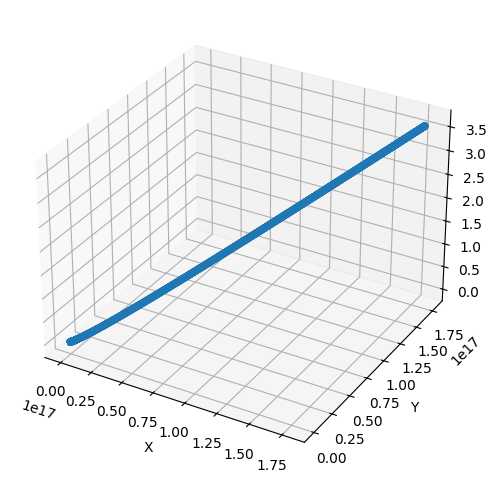

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(diagr_X, diagr_Y, diagr_Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

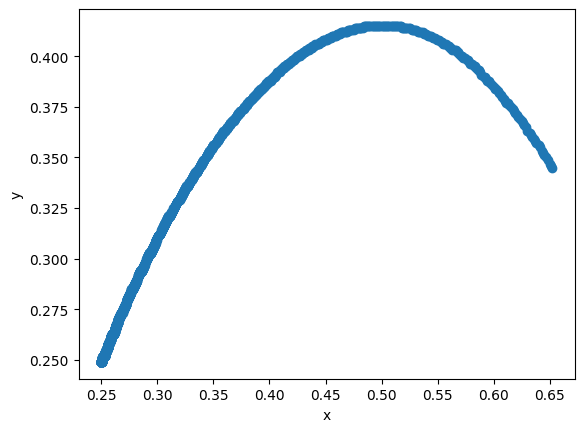

In [7]:
curves_x_np = np.array(curves_x) / 1000
curves_y_np = np.array(curves_y) / 1000
x_flat = curves_x_np.flatten()
y_flat = curves_y_np.flatten()
plt.figure()
plt.scatter(x_flat, y_flat)
plt.xlabel("x")
plt.ylabel("y")
plt.show()




---


> Τα x,y απεικονίζονται στο `chroma_diagram`, όπου φαίνεται η τροχιά που διαγράφουν τα διάφορα σημεία από 1000Κ έως 30000Κ. Με τον τρόπο αυτό, επιτυχάνεται η οπτικοποίηση του τρόπου μεταβολής της αντίληψης του χρώματος, ανάλογα με τη θερμοκρασία.

> *Παρατήρηση: Τα περισσότερα σημεία καλύπτουν τα πορτοκαλί-κόκκινα φάσματα των χρωμάτων.*




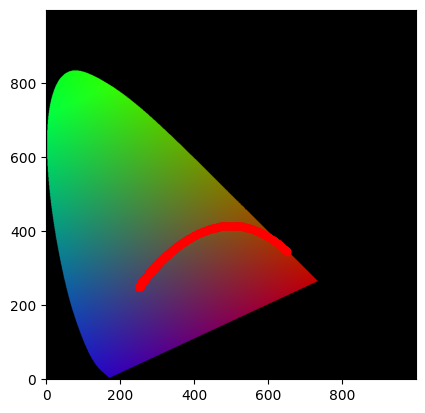

In [8]:
chroma_diagram = cv2.imread('chromaDiagram.png')
chroma_diagram = cv2.cvtColor(chroma_diagram, cv2.COLOR_BGR2RGB)
plt.imshow(chroma_diagram)
plt.scatter(curves_x, curves_y, c='red', s=20)
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.show()



---



> Πρώτον μετατρέπονται τα (curves_x, curves_y) σε NumPy array για το Step 6.


> Δεύτερον διαιρούνται με 1000 για να την επαναφορά των x,y σε κλίμακα [0, 1].






---


## **Step 3**

### 3.1 Using Colour

In [9]:
!pip install colour-science colour-demosaicing
!pip install colour-demosaicing

import colour

from colour_demosaicing import (
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

colour.plotting.colour_style();
colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]           *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.6                                                        *
*       colour-demosaicing : 0.2.6                                            *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.37.0                                                      *
*       matplotlib : 3.10.0                                                   *
*       networkx : 3.4.2                                                      *
*       numpy : 2.0.2                   

/usr/local/lib/python3.11/dist-packages/colour/utilities/verbose.py:322: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)  # noqa: B028


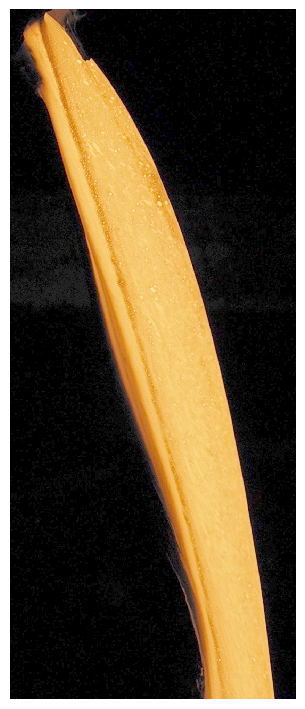

In [10]:
CFA = colour.io.read_image('CFA_stream.png')

image_rgb_colour = colour.cctf_encoding(demosaicing_CFA_Bayer_Menon2007(CFA, 'GBRG'))

colour.plotting.plot_image(image_rgb_colour);

# height, width = CFA.shape
# print(height)
# cv2_imshow(CFA)

### 3.2 Using Opencv

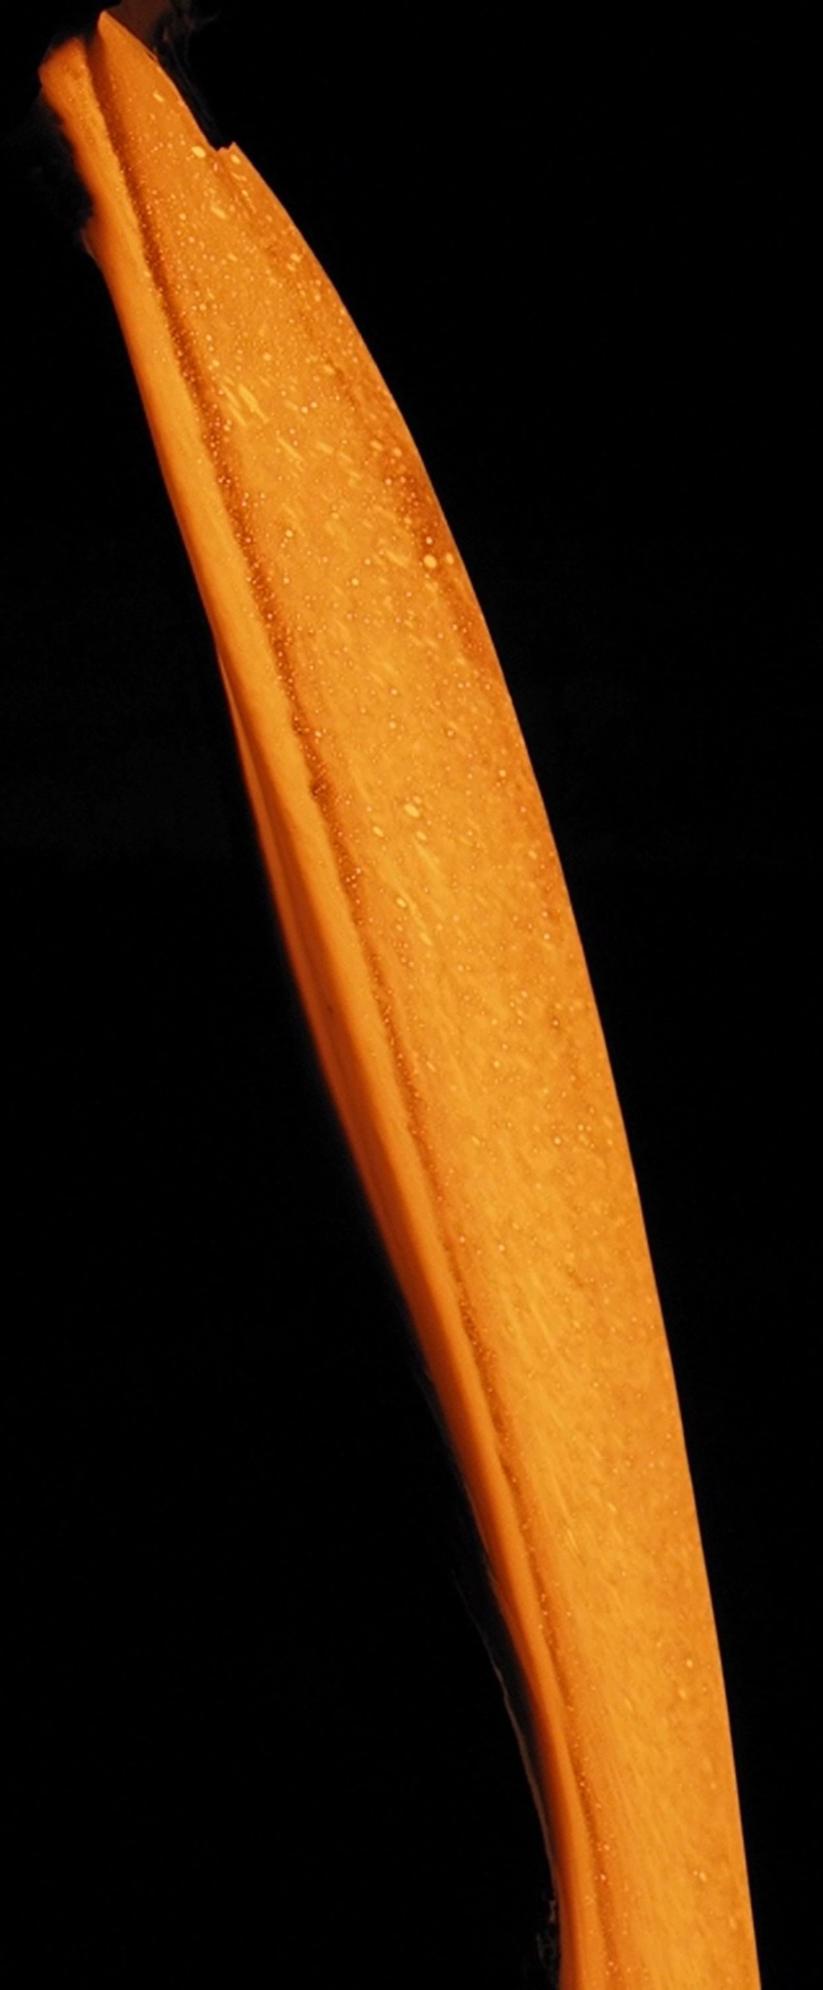

In [11]:
# image = cv2.imread('CFA_stream.png')
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.imread('CFA_stream.png',cv2.IMREAD_GRAYSCALE)

image_demosaiced = cv2.cvtColor(image_gray, cv2.COLOR_BayerGR2RGB) # COLOR_BayerGB2RGB
image_rgb_cv = image_demosaiced
image_gbr = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2BGR)

cv2_imshow(image_gbr)



---


## **Step 4**



> Πρώτα μετατρέπεται η **Colour** εικόνα από RGB -> XYZ.



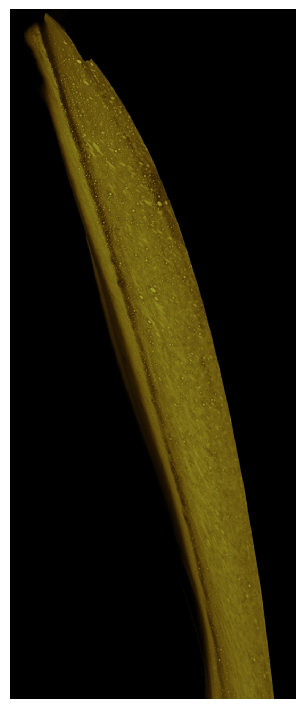

0.687115999754


In [12]:
img_rgb = image_rgb_cv.astype(np.float32) / 255.0 # Η colour διαβαζει το rgb οχι το bgr image

image_xyz_colour = colour.models.sRGB_to_XYZ(img_rgb)

# image_xyz_colour = colour.models.sRGB_to_XYZ(image_rgb)

colour.plotting.plot_image(image_xyz_colour);
print(np.max(image_xyz_colour))



> Έπειτα μετατρέπεται η **OpenCV** εικόνα από RGB -> XYZ.


> *Παρατήρηση: Η `np.max(image_xyz_cv)` γυρνάει την τιμή **212**. Θα πρέπει να γίνει **κανονικοποίηση** στο Step 6.*




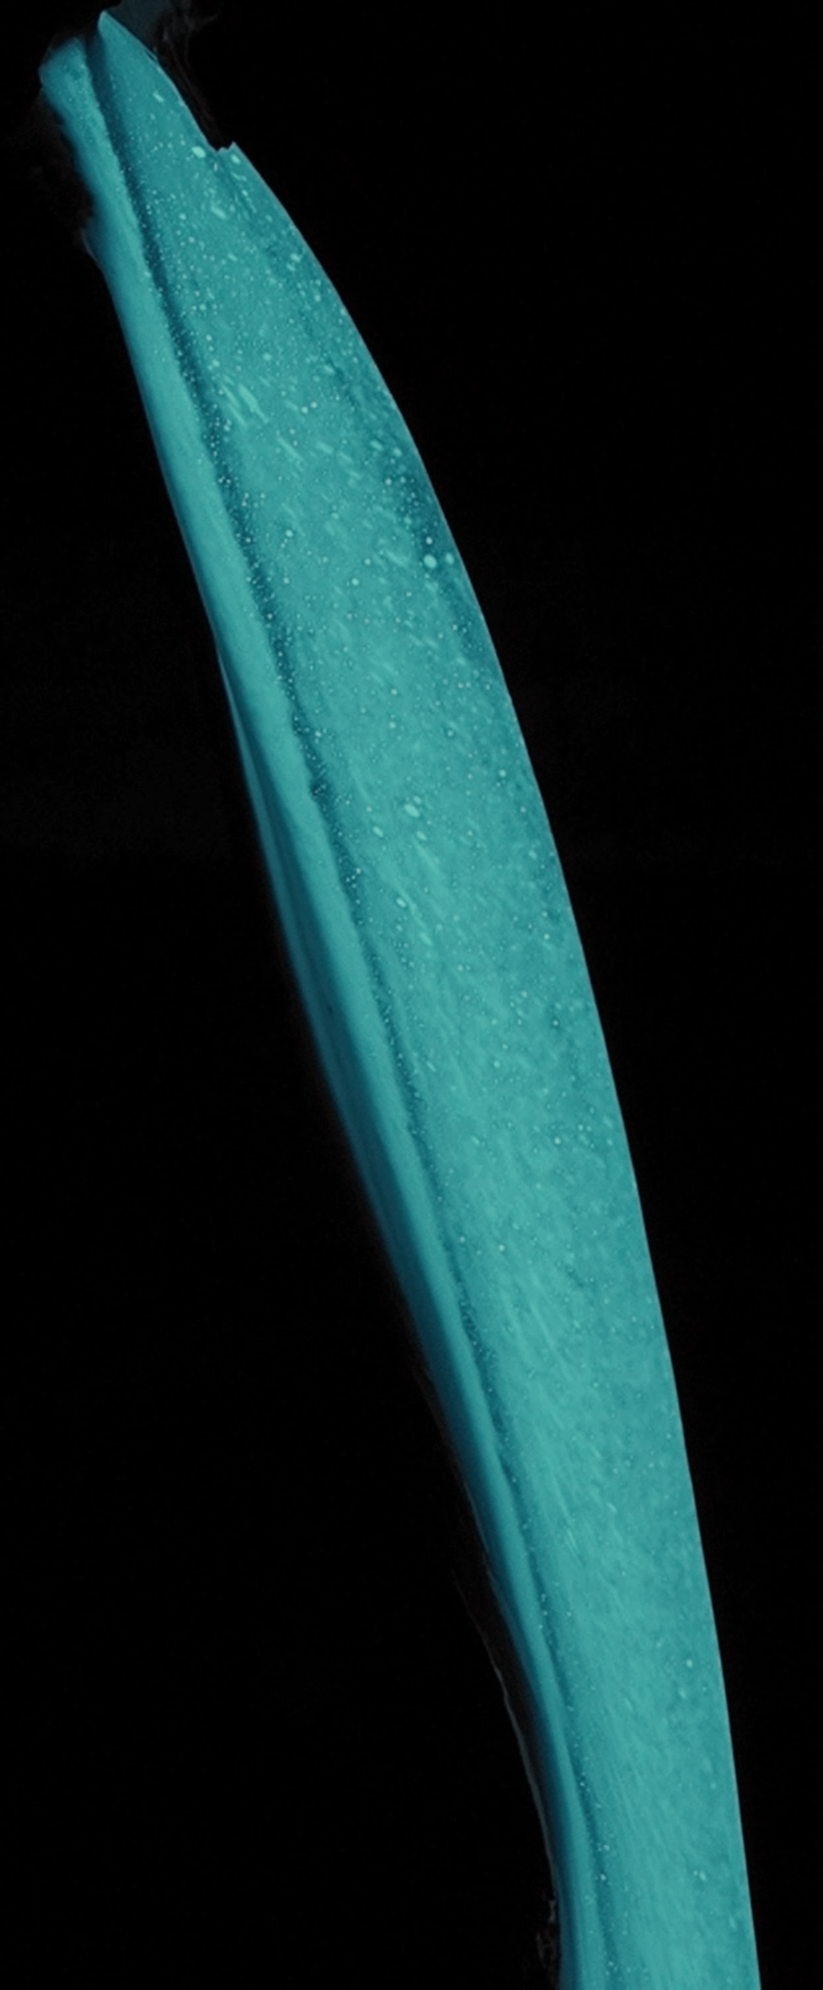

212


In [13]:
image_xyz_cv = cv2.cvtColor(image_rgb_cv, cv2.COLOR_RGB2XYZ)
cv2_imshow(image_xyz_cv) # in GBR
print(np.max(image_xyz_cv))



---


## **Step 5**



> Aπομονώνεται η περιοχή του υλικού (το κόκκινο-hot μέρος) από το υπόβαθρο έτσι, ώστε να μπορεί να υπολογιστεί η θερμοκρασία μόνο της περιοχής ενδιαφέροντος και όχι του background. Εδώ, εφαρμόζεται η δυαδική μάσκα στην αρχική εικόνα, καλύπτοντας τις R,G,B τιμές από `[0-255, 0-70, 0-130]` αντίστοιχα (με βάση την μέση τιμή των R,G,B σε όλη την εικόνα).



> Ως όρισμα επιλέχθηκε η `image_xyz_cv` που προέκυψε από την RGB της **OpenCV**.



Μέσο RGB: [ 41.48228445  40.87206262  14.81570367]


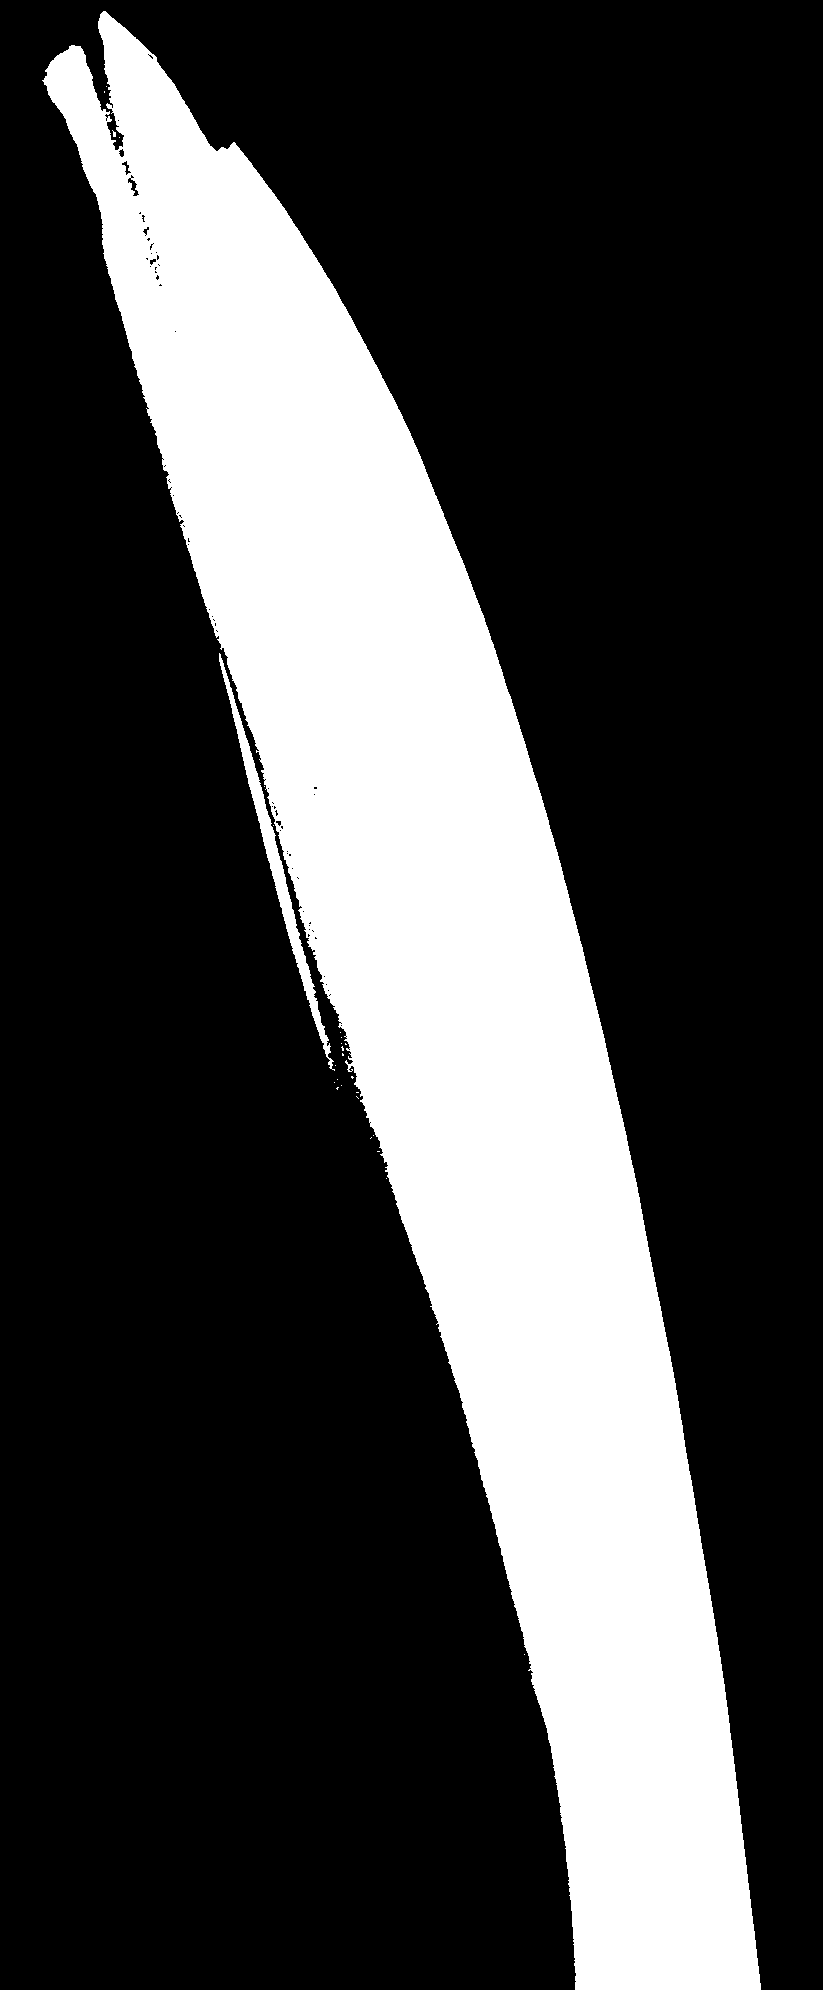

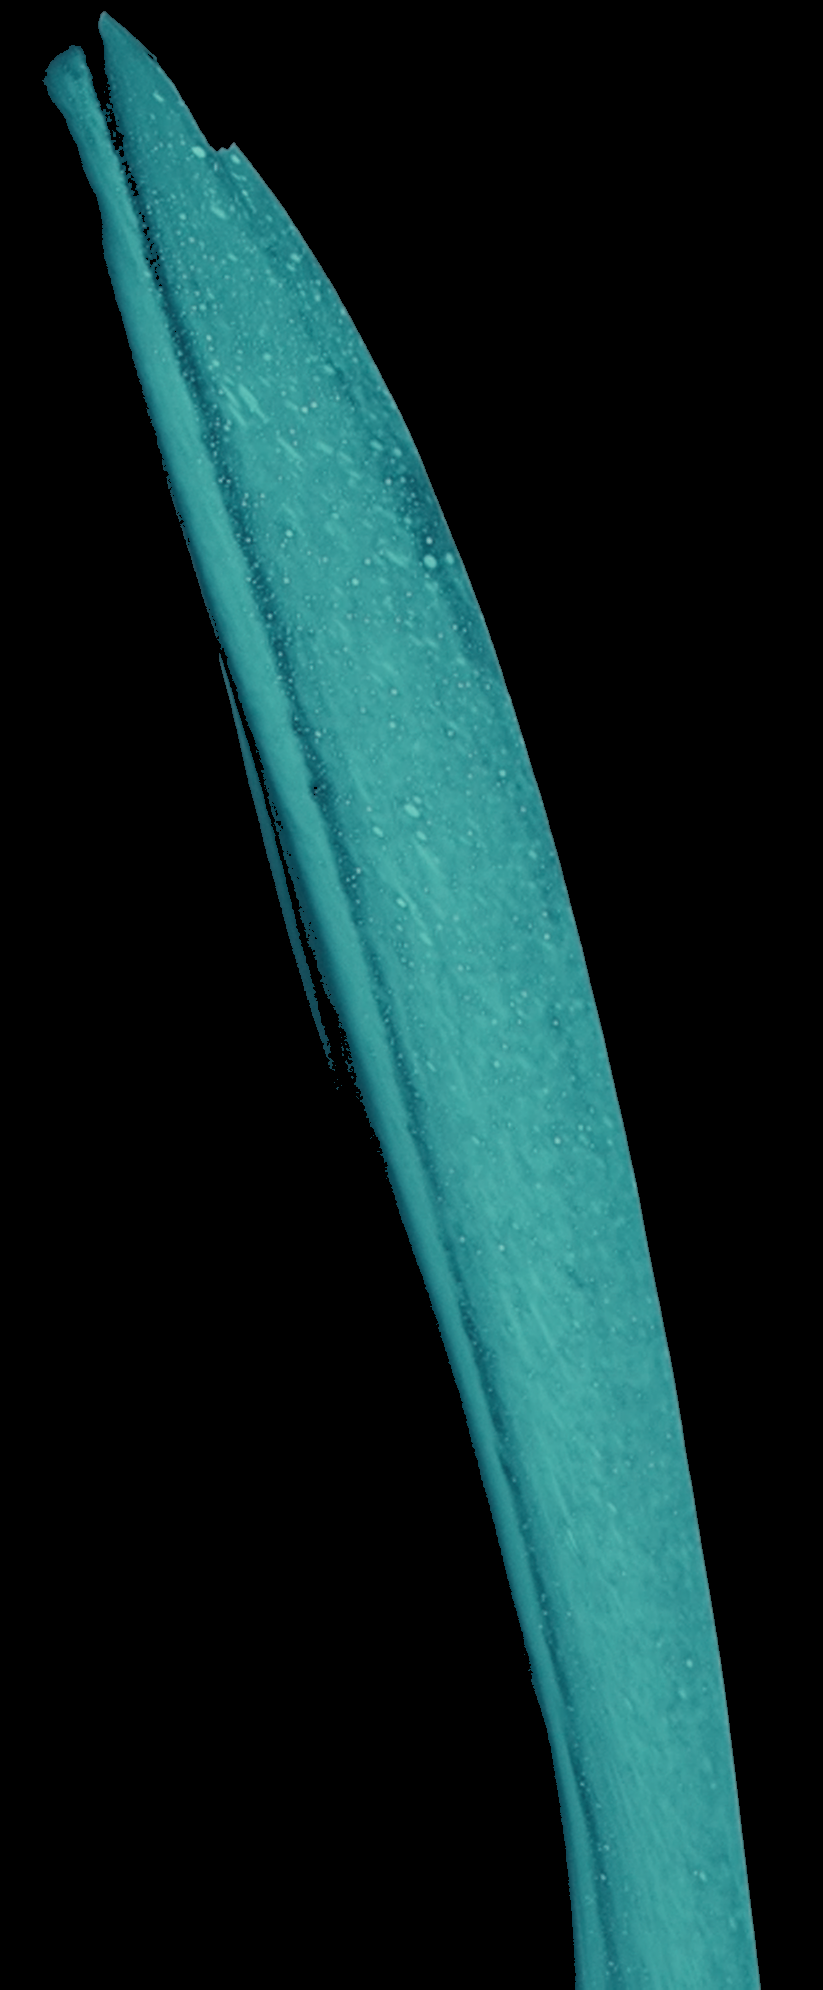

In [14]:
# cv2_imshow(image_rgb_cv)

mean_rgb = np.mean(image_xyz_cv, axis=(0, 1))
print("Μέσο RGB:", mean_rgb)

# mask_r = cv2.inRange(image_rgb_cv[:,:,0],0,20)
# mask_g = cv2.inRange(image_rgb_cv[:,:,1],0,70)
# mask_b = cv2.inRange(image_rgb_cv[:,:,2],0,130)
# cv2_imshow(mask_b)
# mask_r = cv2.bitwise_not(mask_r)
# mask_g = cv2.bitwise_not(mask_r)
# mask_b = cv2.bitwise_not(mask_r)

# result = cv2.bitwise_and(image_rgb_cv,image_rgb_cv,mask = mask_r & mask_g & mask_b) # ???????????????????????????????????????????
# cv2_imshow(result)


min_rgb = np.array([0, 0, 0])
max_rgb = np.array([255, 70, 130])
mask = cv2.inRange(image_xyz_cv, min_rgb, max_rgb)
inverted_mask = cv2.bitwise_not(mask)
cv2_imshow(inverted_mask)

image_xyz_masked = cv2.bitwise_and(image_xyz_cv, image_xyz_cv, mask=inverted_mask)
cv2_imshow(image_xyz_masked)



---


## **Step 6**


>  Για όλα τα pixels που βρίσκονται εντός της μάσκας `image_xyz_masked`, υπολογίζονται οι συντεταγμένες x,y από τις τιμές XYZ.


> Όπως αναφέρθηκε και στο **Step 2**, εφαρμόζεται **κανονικοποίηση** έτσι, ώστε τα x,y να βρίσκονται εντός των ορίων `[0, 1]`.


> Τέλος, προκύπτει ότι:
```
s_image range: 0.0 2.0862745098
x_image range: 0.0 0.529411764706
y_image range: 0.0 0.464419475655
```

In [20]:
Xs = image_xyz_masked[:, :, 0] / 255
Ys = image_xyz_masked[:, :, 1] / 255
Zs = image_xyz_masked[:, :, 2] / 255

s_image = Xs + Ys + Zs

print(np.max(Xs), np.max(Ys), np.max(Zs))
# print(s_image[100])

x_image = Xs / s_image
y_image = Ys / s_image

x_image_valid = np.nan_to_num(Xs / s_image, nan=0.0, posinf=0.0, neginf=0.0)
y_image_valid = np.nan_to_num(Ys / s_image, nan=0.0, posinf=0.0, neginf=0.0)

# x,y in range of (0, 255) or (0, 1) ????????????????
# print("s_image range:", np.nanmin(s_image), np.nanmax(s_image))
# print("x_image range:", np.min(x_image_valid), np.max(x_image_valid))
# print("y_image range:", np.min(y_image_valid), np.max(y_image_valid))

0.776470588235 0.83137254902 0.545098039216


<ipython-input-20-61c47be88e3b>:10: RuntimeWarning: invalid value encountered in divide
  x_image = Xs / s_image
<ipython-input-20-61c47be88e3b>:11: RuntimeWarning: invalid value encountered in divide
  y_image = Ys / s_image
<ipython-input-20-61c47be88e3b>:13: RuntimeWarning: invalid value encountered in divide
  x_image_valid = np.nan_to_num(Xs / s_image, nan=0.0, posinf=0.0, neginf=0.0)
<ipython-input-20-61c47be88e3b>:14: RuntimeWarning: invalid value encountered in divide
  y_image_valid = np.nan_to_num(Ys / s_image, nan=0.0, posinf=0.0, neginf=0.0)


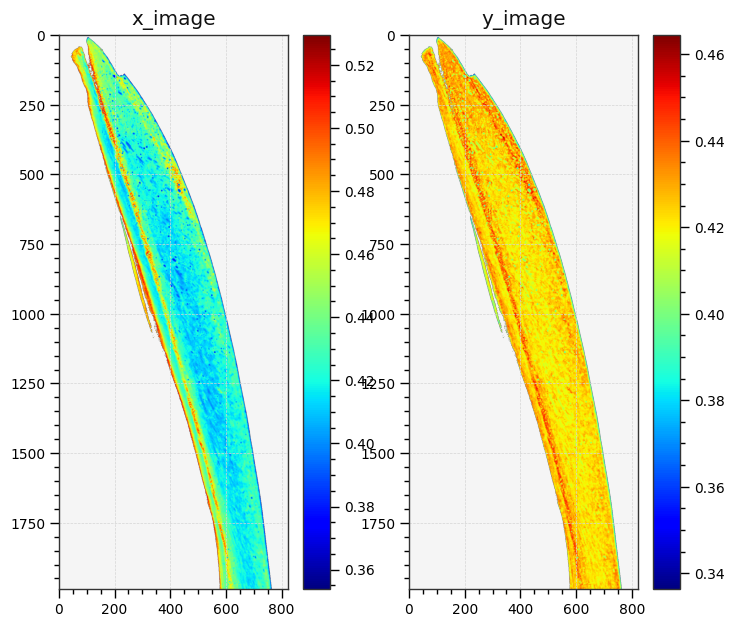

In [21]:
plt.figure()
plt.subplot(131)
plt.imshow(x_image, cmap='jet')
plt.colorbar()
plt.title("x_image")
plt.subplot(132)
plt.imshow(y_image, cmap='jet')
plt.colorbar()
plt.title("y_image")
plt.show()


>  Για την εύρεση του **κοντινότερου σημείου** των `x_image, y_image` ως προς τα αρχικά `curves_x, curves_y`, χρησιμοποιήθηκε η συνάρτηση **cKDTree** (η οποία έχει παρόμοια νοοτροπία με τον KNN αλγόριθμο αλλά για k = 2 διαστάσεις).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html


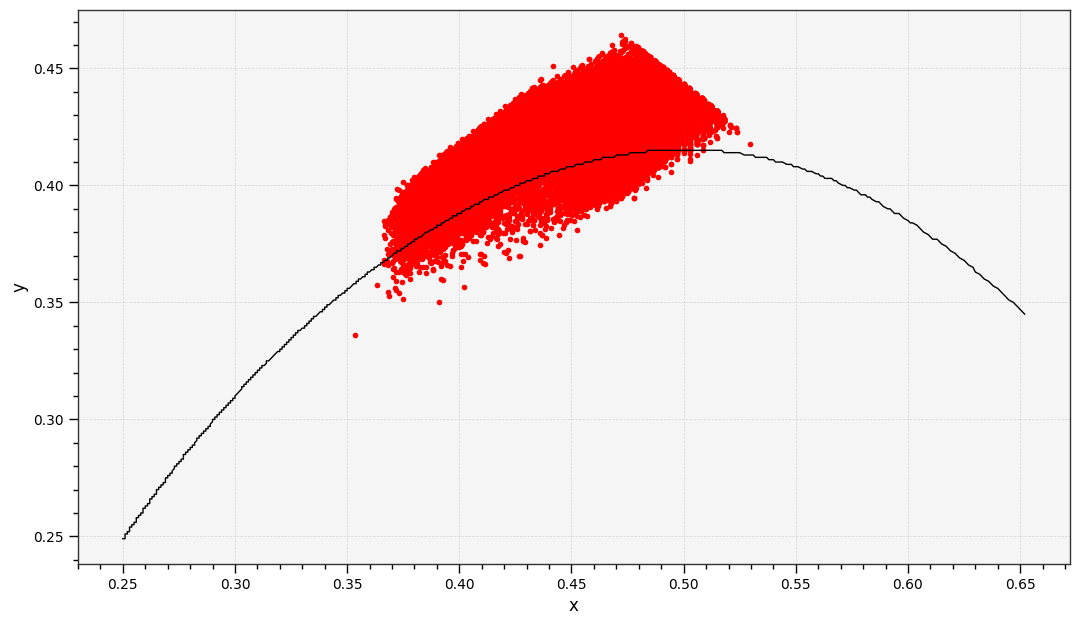

In [22]:
x_image_flat = x_image.flatten()
y_image_flat = y_image.flatten()
plt.figure()
plt.scatter(x_image_flat, y_image_flat)
plt.plot(x_image_flat, y_image_flat, 'ro', x_flat, y_flat, 'k')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [23]:
invalid_mask = np.isfinite(x_image) & np.isfinite(y_image)

curves_xy_coords = np.vstack((curves_x_np, curves_y_np)).T

# Build the cKDTree
tree = cKDTree(curves_xy_coords)

pixel_coords_valid = np.column_stack((x_image[invalid_mask], y_image[invalid_mask]))
print("Number of invalid pixels:", np.sum(invalid_mask))

# Query the tree to find the nearest original (x,y) for each valid pixel
_, indices = tree.query(pixel_coords_valid)

# List -> NumPy
curves_T = np.array(curves_T)

# Get the corresponding temperatures for the valid pixels
valid_temps = curves_T[indices]

temp_map = np.empty_like(x_image, dtype=float)
temp_map[invalid_mask] = valid_temps

# Mask out the invalid positions
temperature_map = np.ma.masked_array(temp_map, mask=~invalid_mask)

Number of invalid pixels: 440946




---


## **Step 7**

### 7.1 Histogram

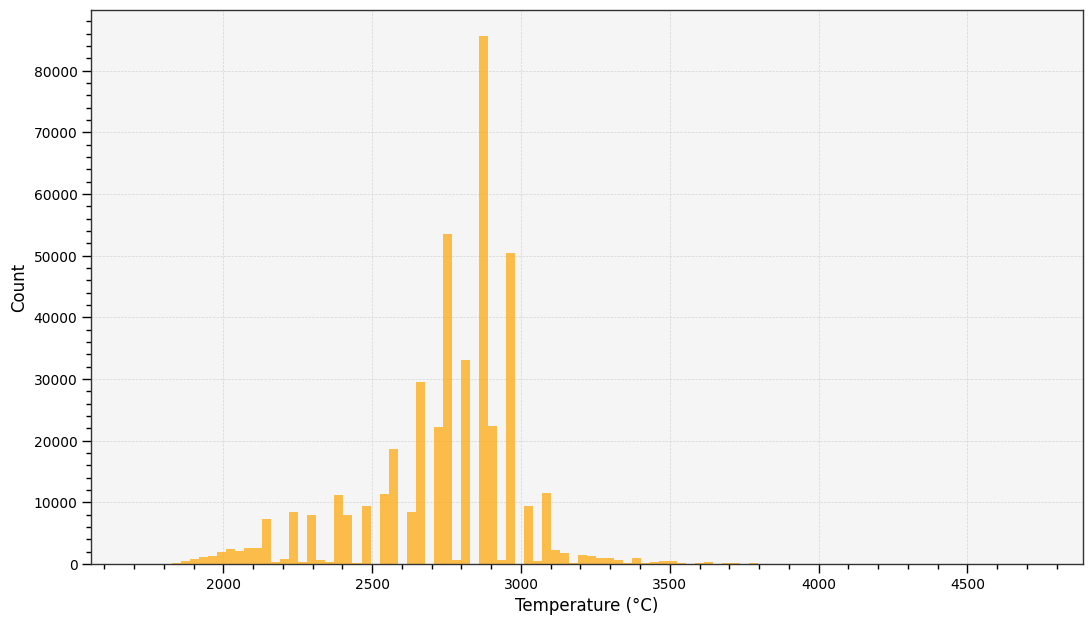

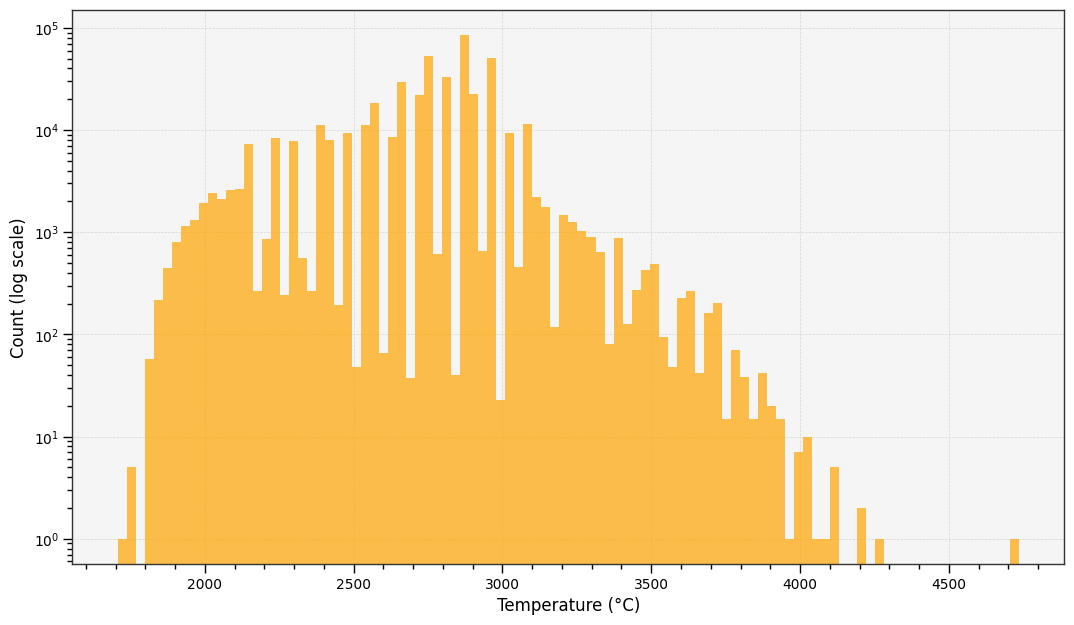

In [24]:
temp_celsius = temperature_map - 273.15

# Flatten the array to 1D for histogram
valid_temps = temp_celsius[~np.isnan(temp_celsius)]

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

plt.hist(valid_temps, bins=100, color='orange', alpha=0.7)
plt.yscale('log')
plt.xlabel("Temperature (°C)")
plt.ylabel("Count (log scale)")
plt.show()

### 7.2 Heatmap

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap

https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [25]:
print("temperature_image range:",
      np.nanmin(temp_celsius),
      np.nanmax(temp_celsius))

mean_temp_c = np.nanmean(temp_celsius)
print("Mean temperature (°C):", mean_temp_c)

temperature_image range: 1706.85 4736.85
Mean temperature (°C): 2742.56310319


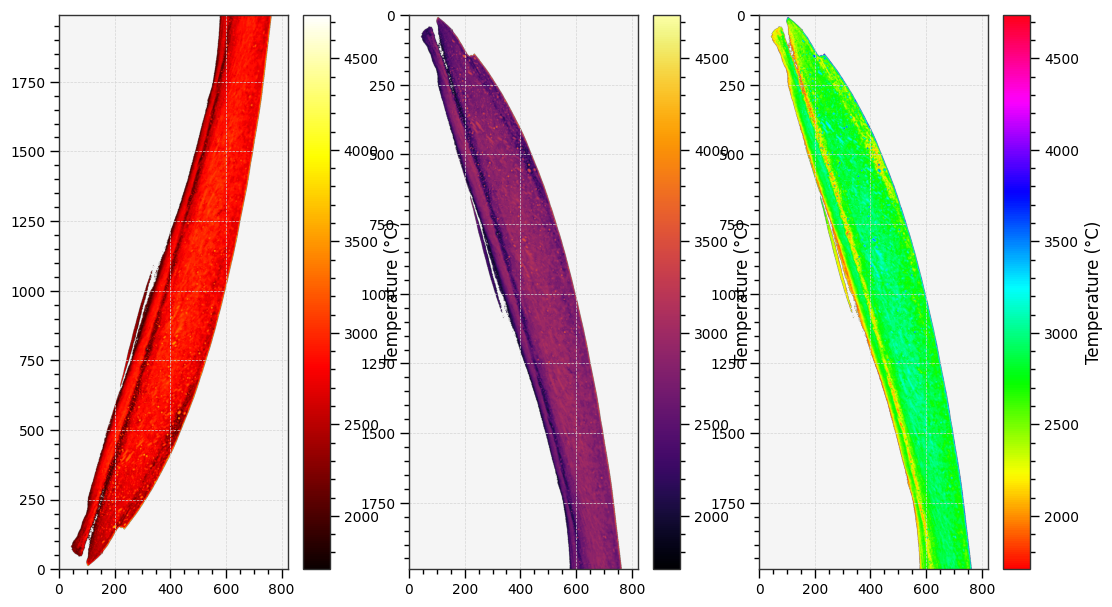

In [29]:
plt.figure()
plt.subplot(131)
plt.imshow(temp_celsius, cmap='hot', origin='lower')
# plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label="Temperature (°C)")

plt.subplot(132)
plt.imshow(temp_celsius, cmap='inferno', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')

plt.subplot(133)
plt.imshow(temp_celsius, cmap='hsv', origin='lower')
plt.gca().invert_yaxis()  # invert y-axis for clarity
plt.colorbar(label='Temperature (°C)')
plt.show()